In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import pysam
import numpy as np
import matplotlib

import math
import sys
from collections import defaultdict

In [27]:
bam_file = ("/SGRNJ06/randd/USER/cjj/celedev/rna/20230608/3/Mus_0602PZ_CS2_N3lib/03.star/Mus_0602PZ_CS2_N3lib_Aligned.sortedByCoord.out.bam")

In [35]:
with pysam.AlignmentFile(bam_file, "rb") as in_bam:
    for read in in_bam:
        print(read.reference_name)
        print(read.reference_start)
        print(read.reference_end)
        print(in_bam.get_reference_length(read.reference_name))
        break

1
3020125
3243388
195471971


In [29]:

    pos_dict = defaultdict(int)

    with pysam.AlignmentFile(bam_file, "rb") as in_bam:
        n_read = 0

        for read in in_bam:
            n_read += 1
            start, end = read.reference_start, read.reference_end
            ref_length = in_bam.get_reference_length(read.reference_name)
            start_percent, end_percent = math.floor(start / ref_length * 100), math.ceil(end / ref_length * 100)
            for index in range(start_percent, end_percent + 1):
                pos_dict[index] += 1


In [30]:
sort_dic = sorted(pos_dict.items(), key=lambda x: x[0])

In [ ]:
sort_dic

In [31]:
    y_list = []
    for i in sort_dic:
        y_list.append(i[1])

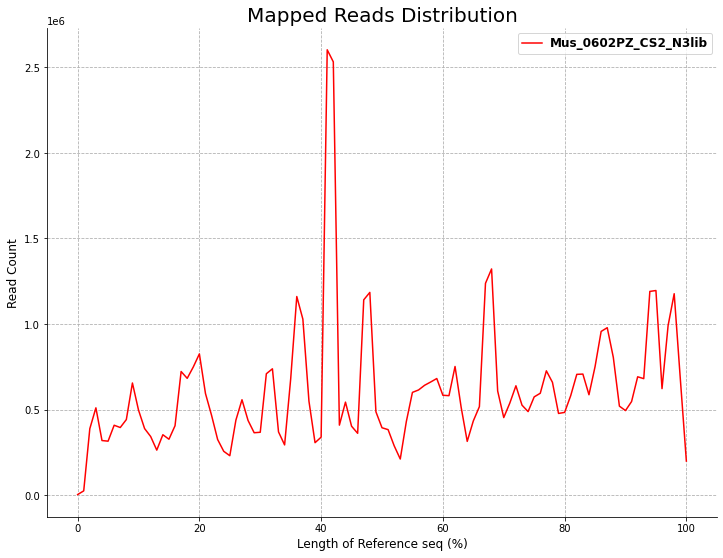

In [32]:
    x_list = [i for i in range(101)]
    plt.figure(figsize=(12, 9))
    plt.grid(linestyle="--")
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.plot(x_list, y_list, linewidth=1.5, color='red', label="Mus_0602PZ_CS2_N3lib")

    plt.title("Mapped Reads Distribution", fontsize=20)
    plt.xlabel("Length of Reference seq (%)", fontsize=12)
    plt.ylabel("Read Count", fontsize=12)

    plt.tick_params(axis='both', labelsize=10)
    plt.legend(loc=1, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    plt.savefig("/SGRNJ06/randd/USER/cjj/celedev/rna/20230608/3/Mus_0602PZ_CS2_N3lib_mapped_reads_distribution.png", bbox_inches='tight', dpi=300)